In [ ]:
import pandas as pd
import sys
from pprint import pprint
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from sklearn.preprocessing import StandardScaler,RobustScaler

In [ ]:
#mount google drive folder
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Setup working directory and data directory
DIR = '/content/drive/MyDrive/Colab Notebooks/ALA'
DATA_DIR = '/content/drive/MyDrive/ForStudents/Data'

In [ ]:
# Load the data

FILE = DATA_DIR + '/ecg_missing.txt'
df_ecg = pd.read_csv(FILE, header = None, names =['ecgvalues'])
df_ecg.head()


,ecgvalues
0,-1.4374358e-02
1,NaN
2,-1.2637355e-02
3,NaN
4,-1.0812403e-02


In [ ]:
df_ecg["ecgvalues"]=df_ecg['ecgvalues'].astype(float)
df_ecg
df=df_ecg['ecgvalues']
print(df)

0     -0.014374
1           NaN
2     -0.012637
3           NaN
4     -0.010812
         ...   
195         NaN
196    0.033077
197         NaN
198         NaN
199    0.023651
Name: ecgvalues, Length: 200, dtype: float64


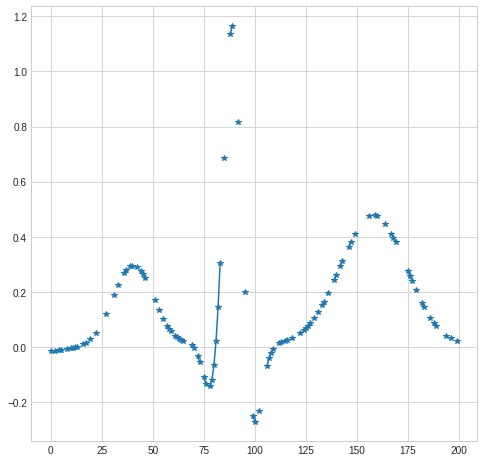

In [ ]:
# Component plot of the ecg signal
fig,ax=plt.subplots(1,1,figsize=(8,8))
component_index=range(0,len(df))
ax.plot(component_index,df,marker='*')

In [ ]:
# Extract the indices corresponding to missing ecg values
t_unknown=df[df.isnull()].index
print(t_unknown)
print('============================================================================================')
t_known=df[~df.isnull()].index #not null
print(t_known) # extacting indeces

Int64Index([  1,   3,   6,   7,   9,  14,  15,  18,  20,  21,  23,  24,  25,
             26,  28,  29,  30,  32,  34,  35,  38,  41,  43,  47,  48,  49,
             50,  52,  54,  56,  60,  66,  67,  68,  71,  74,  77,  84,  86,
             87,  90,  91,  93,  94,  96,  97,  98, 101, 103, 104, 105, 110,
            111, 114, 117, 119, 120, 121, 123, 128, 130, 132, 135, 137, 138,
            141, 144, 145, 148, 150, 151, 152, 153, 154, 155, 157, 158, 161,
            162, 163, 165, 166, 170, 171, 172, 173, 174, 178, 180, 181, 184,
            185, 187, 190, 191, 192, 193, 195, 197, 198],
           dtype='int64')
Int64Index([  0,   2,   4,   5,   8,  10,  11,  12,  13,  16,  17,  19,  22,
             27,  31,  33,  36,  37,  39,  40,  42,  44,  45,  46,  51,  53,
             55,  57,  58,  59,  61,  62,  63,  64,  65,  69,  70,  72,  73,
             75,  76,  78,  79,  80,  81,  82,  83,  85,  88,  89,  92,  95,
             99, 100, 102, 106, 107, 108, 109, 112, 113, 115, 116, 11

In [ ]:
# Build Vector of known ecg values
x_known=df[~df.isnull()]
print(x_known) #extracting values

0     -0.014374
2     -0.012637
4     -0.010812
5     -0.009853
8     -0.006548
         ...   
188    0.085758
189    0.076497
194    0.042017
196    0.033077
199    0.023651
Name: ecgvalues, Length: 100, dtype: float64


In [ ]:
# BUild Sampling matrices S1 and S2
I=np.eye(len(df))
print(I)
print('******************************************************')
S1=I[:,t_known]
print(S1)
print('******************************************************')
S2=I[:,t_unknown]
print(S2)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
******************************************************
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
******************************************************
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Build the second difference matrix D
n=len(df)
a=1*np.ones(n-1)
print(n) 
print('======')
print(np.diag(a,1))
b=-2*np.ones(n)
print(b)
print('=======')
d=np.diag(a,1)+np.diag(b)+np.diag(a,-1)
print(d)
d=d[1:-1,] 
print(d)
print(S1.shape)   #known vector
print(d.shape)    #constant matrix
print(S2.shape)   #unknown vector

200
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
[-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2.]
[[-2.  1.  0. ...  0.  0.  

In [ ]:
A=np.dot(d,S2)
print(d)
print('***************************************************')
print(S2)
print('***************************************************')
print(A)
print('***************************************************')
# print(A.shape)
b=np.dot(np.dot(-d,S1),x_known) # d*s1*xk
v=linalg.lstsq(A,b) #|| Av-b || 
print('***************************************************')
print(v)

[[ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]]
***************************************************
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
***************************************************
[[-2.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  0. ...  0.  0.  0.]
 [ 0. -2.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  1.  0.]
 [ 0.  0.  0. ...  0. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
***************************************************
***************************************************
(array([-0.01351183, -0.01173897, -0.00883719, -0.00774259, -0.005233  ,
        0.00491464,  0.00812556,  0.02172347,  0.03505588,  0.04332338,
        0.06372848,  0.07592295,  0.08934318,  0.10391254,  0.1361921 ,
        0.15354526,  0.17133346,  0

In [ ]:
df_ecg.loc[t_unknown,'ecgvalues']=v[0].flatten()

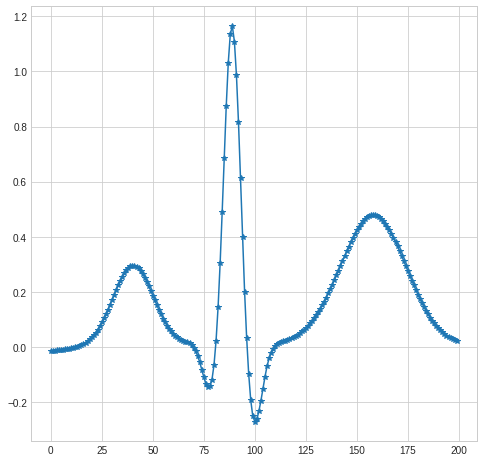

In [ ]:
# Component plot of the ecg signal
fig,ax=plt.subplots(1,1,figsize=(8,8))
component_index=range(0,len(df_ecg['ecgvalues']))
ax.plot(component_index,df_ecg['ecgvalues'],marker='*')

## DATA MATRIX

**Data Matrix**

Patient dataset corresponding to 4 patients and 3 features:

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

In [ ]:
df = pd.DataFrame({'HR' : [76, 74, 72, 78],
                   'BP' : [126, 120, 118, 136],
                   'Temp': [38.0, 38.0, 37.5, 37.0]})

print(df)
print('----------')
X = np.array(df)
print(X)

   HR   BP  Temp
0  76  126  38.0
1  74  120  38.0
2  72  118  37.5
3  78  136  37.0
----------
[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]


**Vectors from the data matrix**

![Patient dataset](https://bl3302files.storage.live.com/y4mTMCQdiTnIFj1IALg09CRz7pPWl0g4HpigAPbwyMmF0QNliGAgK3aEsBESo0BNFCy-0-kR6pllskO1DPVt2-76bYsQaACRWhkOebqJ545BbtWcGr1CJG72BZJPrYbQDWNAC0h1EHhpewBlORT_xtahEu-bite73OVi-4CzGeQf6GDw11H6kn72VocdC2bLAsJ?width=256&height=167&cropmode=none)

1st feature vector (heart rate) for all patients:
$$x_1 = \begin{bmatrix}76\\74\\72\\78\end{bmatrix}$$

1st patient vector for all features:
$$x^{(1)} = \begin{bmatrix}76\\126\\38\end{bmatrix}$$

In [ ]:
# Vector for 1st feature (HR)
x_1 = X[:, 0]
print(x_1)
#print(x_1.shape)
#print(x_1.reshape(-1,1))
#print(x_1.reshape(-1,1).shape)

# Vector for 2nd feature (BP)
x_2 = X[:, 1]
print(x_2)

# Vector for 1st patient
x1 = X[0, :]
print(x1)

# Vector for 2nd patient
x2 = X[1, :]
print(x2)

# Vector for 2nd patient but only 1st and 2nd features
print(X[1, 0:2])

[76. 74. 72. 78.]
[126. 120. 118. 136.]
[ 76. 126.  38.]
[ 74. 120.  38.]
[ 74. 120.]


**Components of a vector and matrix**

The components of a vector $x$ are denoted as $x_1,x_2,\ldots.$

The component in the $i$th row and $j$th column of a matrix is $X$ is represented as $X_{ij}.$

2nd patient, 1st feature (heart rate) value is $x^{(2)}_1.$

1st feature (heart rate), 2nd patient value is $\left(x_1\right)_2.$




In [ ]:
# 2nd patient vector
x2 = X[1, :]

# 1st feature (heart rate) vector
x_1 = X[:, 0]

# 2nd patient, 1st feature (heart rate) value
print(x_1[1])
print(x2[0])

# Directly from the data matrix
print(X[1, 0])

74.0
74.0
74.0


In [ ]:
# Vector addition
print(x1 + x2)

# Vector subtraction
print(x1 - x2)

# Scalar-vector multiplication
print(0.5*(x1 + x2))

[150. 246.  76.]
[2. 6. 0.]
[ 75. 123.  38.]


**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$a{\color{cyan}\cdot}b = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.

In [ ]:
# Unit vectors
e_1 = np.array([1, 0, 0, 0])
e_3 = np.array([0, 0, 1, 0])

# Ones vector
o = np.array([1, 1, 1, 1])

# Vector for 1st feature (heart rate)
x_1 = X[:, 0]

# Get 1st component of vector (heart rate for 1st patient)
print(x_1[0])
print(np.dot(e_1, x_1))

# Get 3rd component of vector (heart rate for 3rd patient)
print(np.dot(e_3, x_1))

# Get sum of 1st feature values (heart rate) for all patients
print(np.sum(x_1))
print(np.dot(o, x_1))

# Average of 1st feature values (heart rate)
print((1/len(x_1))*np.dot(o, x_1))
print(np.mean(x_1))

76.0
76.0
72.0
300.0
300.0
75.0
75.0


In [ ]:
# Norm of the 1st feature (heart rate) vector
print(np.linalg.norm(x_1))
print(np.sqrt(np.dot(x_1, x_1))) #relation b/w norm and the dot prod

150.06665185843255
150.06665185843255


In [ ]:
# RMS value of the 1st feature (heart rate) vector
print(np.linalg.norm(x_1)/np.sqrt(len(x_1))) 

# Compare with the average of the 1st feature (heart rate) vector
print(np.mean(x_1)) 

print(x_1)

75.03332592921628
75.0
[76. 74. 72. 78.]


In [ ]:
# Calculate the de-meaned heart rate vector
x_1m = x_1 - np.mean(x_1)
print(x_1m)

[ 1. -1. -3.  3.]


In [ ]:
# Standard deviation of the 1st feature (heart rate) vector
# Set option to print the entire dataframe
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [ ]:
# Simulate a patient dataset
#np.random.seed(100)
nsamples = 100
df = pd.DataFrame({'Heart Rate (BPM)' : np.round(np.random.normal(74, 4, nsamples)),
                   'Blood Pressure (mm Hg)' : np.round(np.random.normal(126, 8, nsamples))})
print(df)

    Heart Rate (BPM)  Blood Pressure (mm Hg)
0               65.0                   135.0
1               75.0                   123.0
2               75.0                   133.0
3               78.0                   130.0
4               77.0                   127.0
5               72.0                   130.0
6               72.0                   112.0
7               72.0                   131.0
8               72.0                   141.0
9               73.0                   125.0
10              79.0                   130.0
11              75.0                   130.0
12              74.0                    95.0
13              69.0                   131.0
14              76.0                   115.0
15              68.0                   118.0
16              81.0                   127.0
17              80.0                   117.0
18              76.0                   111.0
19              71.0                   116.0
20              69.0                   111.0
21        

Text(0.5, 1.0, 'Heart Rate vs. Blood Pressure')

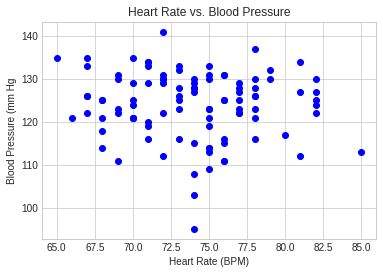

In [ ]:
# How are the heart rate and blood pressure values related?
# Scatter plot between heart rate (BPM) and blood pressure (mm Hg)
a = df['Heart Rate (BPM)']
b = df['Blood Pressure (mm Hg)']
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
#ax.set_xlim([0, np.max(a)])
#ax.set_ylim([0, np.max(b)])

In [ ]:
# print(np.std(np.array(a)))
# print(np.linalg.norm(a-np.mean(a))/np.sqrt(nsamples-1))
sc=StandardScaler()
rsc=RobustScaler()
print()  # -1 means itr is left to the system to decide the number of the rows
print()
stdev=lambda x : np.linalg.norm(x-np.mean(x))/np.sqrt(len(x)-1)
df_new=pd.DataFrame({'HR':a,
                     "HRS":sc.fit_transform(a.values.reshape(-1,1)).flatten(),
                     "HRSD":(a-np.mean(a))/np.std(a),
                     "HRSD1":(a-np.mean(a))/(stdev(a)),
                     "HRR":rsc.fit_transform(a.values.reshape(-1,1)).flatten()})
df_new.head()

,HR,HRS,HRSD,HRSD1,HRR
0,65.0,-2.093032,-2.093032,-2.082540,-1.500000
1,75.0,0.256050,0.256050,0.254766,0.166667
2,75.0,0.256050,0.256050,0.254766,0.166667
3,78.0,0.960774,0.960774,0.955959,0.666667
4,77.0,0.725866,0.725866,0.722228,0.500000


In [ ]:
# Add meaned-centred features to the dataframe
df['Mean-centred Heart Rate (BPM)'] = a - np.mean(a)
df['Mean-centred Blood Pressure (mm Hg)'] = b - np.mean(b)
print(df)

Text(0.5, 1.0, 'Mean Centred Plot of Heart Rate vs. Blood Pressure')

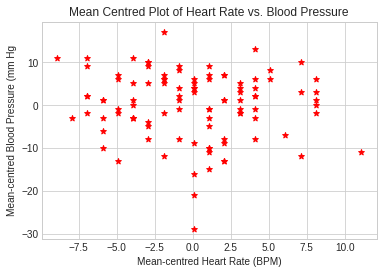

In [ ]:
# Scatter plot between meaned-centred heart rate (BPM) and meaned-centred blood pressure (mm Hg)
a_mc = df['Mean-centred Heart Rate (BPM)']
b_mc = df['Mean-centred Blood Pressure (mm Hg)']
fig, ax = plt.subplots(1)
ax.scatter(a_mc, b_mc, marker = '*', color = 'red')
ax.set_xlabel('Mean-centred Heart Rate (BPM)')
ax.set_ylabel('Mean-centred Blood Pressure (mm Hg')
ax.set_title('Mean Centred Plot of Heart Rate vs. Blood Pressure')

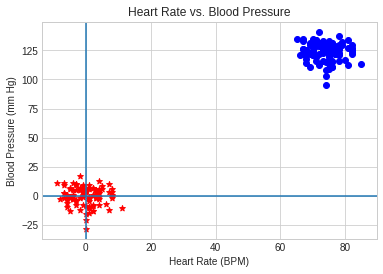

In [ ]:
# Scatter plot both versions
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.scatter(a_mc, b_mc, marker = '*', color = 'red')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg)')
ax.set_title('Heart Rate vs. Blood Pressure')
plt.axvline(0)
plt.axhline(0)

In [ ]:
# Add standardize features to the dataframe
df['Standardize Heart Rate'] = (a - np.mean(a)) / np.std(a)
df['Standardized Blood Pressure'] = (b - np.mean(b)) / np.std(b)
print(df)

In [ ]:
# User-defined function to make a component plot of a vector
def plotveccomp(x, name = None, axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = 'black', marker = 'o') 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') #np.sum(x)
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red') #sum-mc
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red') #sum+mc
  ax.set_xlabel('Patient #', fontsize = 16)
  ax.set_ylabel(name, fontsize = 16)
  ax.set_title(' '.join(name.split()[0:2]) +  ' Vector', fontsize = 14)

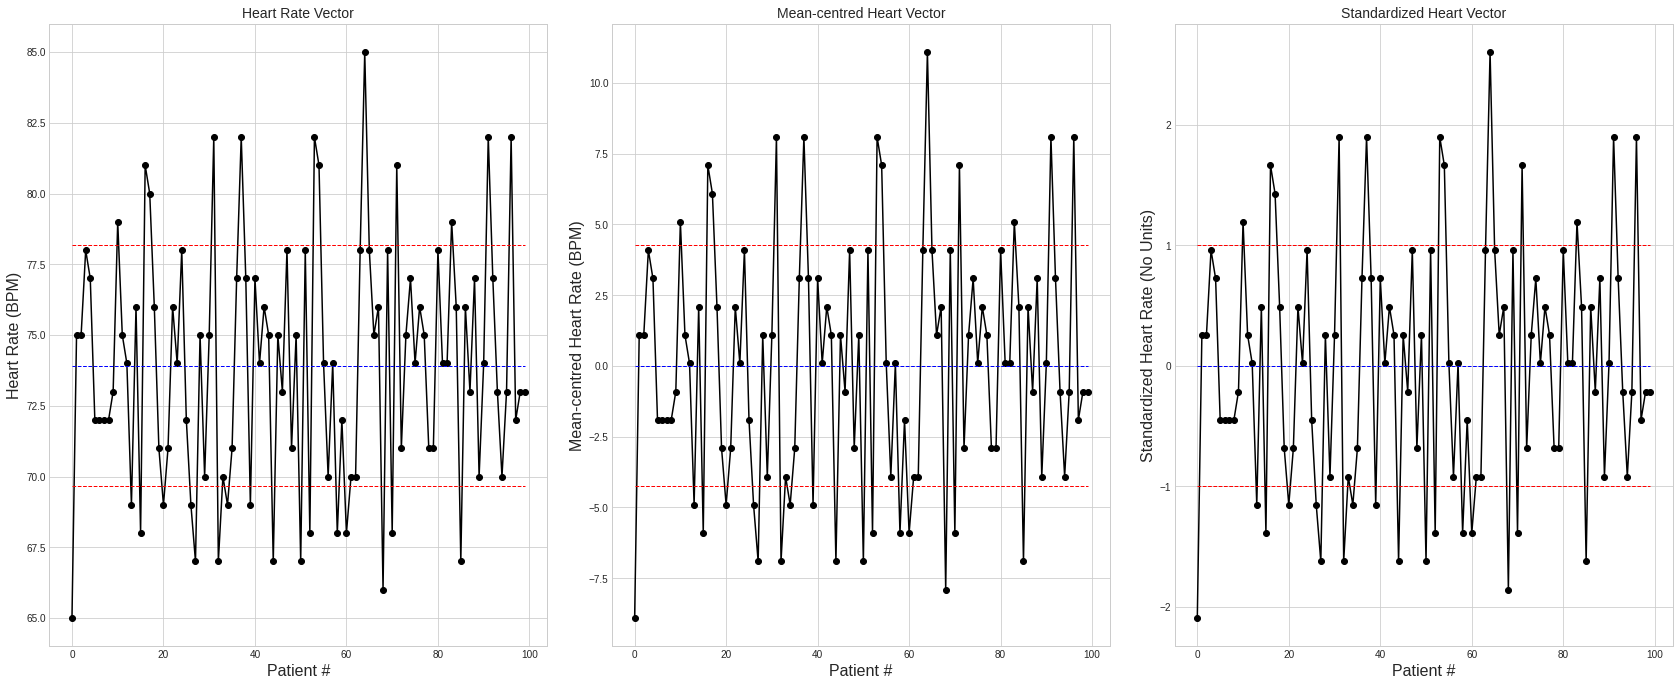

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24,10))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'Heart Rate (BPM)', ax1)
plotveccomp(a - np.mean(a), 'Mean-centred Heart Rate (BPM)', ax2)
plotveccomp((a - np.mean(a))/np.std(a), 'Standardized Heart Rate (No Units)', ax3)
plt.savefig('stdofvec.png')